In [2]:
# Load data
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
player_DF = pd.read_pickle('data_all_TSE')
player_info = pd.read_pickle('info_all_TSE') 
survey = pd.read_pickle('quest_ansers_wra')

In [3]:
# checks whether a strategy is pure or not
def pure_data_player(player_DF):
    p_d = player_DF['strats'].apply(lambda x: 1 if np.array(x).max()==1 else 0)
    player_DF['pure_played'] = p_d
    return player_DF


In [4]:
# How often do people play pure strategies?
player_DF = pure_data_player(player_DF)
player_DF['cum_pure_played'] = player_DF['pure_played'].groupby(player_DF['playerid']).cumsum()
player_DF['pure_played'].sum()/len(player_DF)


0.4140149908075237

In [1]:
%config Completer.use_jedi = False


In [5]:
from sklearn.linear_model import LogisticRegression
gid = 6
sid =2
X = player_DF[['cum_pure_played']][(player_DF.gameid==gid) & (player_DF.session==sid)][1:]
X = pd.concat([X.reset_index(drop=True),player_DF['round'][(player_DF.gameid==gid) & (player_DF.session==sid)][:-1].reset_index(drop=True)], axis=1)
y = player_DF['pure_played'][(player_DF.gameid==gid) & (player_DF.session==sid)][1:].reset_index(drop=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.coef_
np.exp(clf.coef_[0])

array([1.0359689 , 1.01872624])

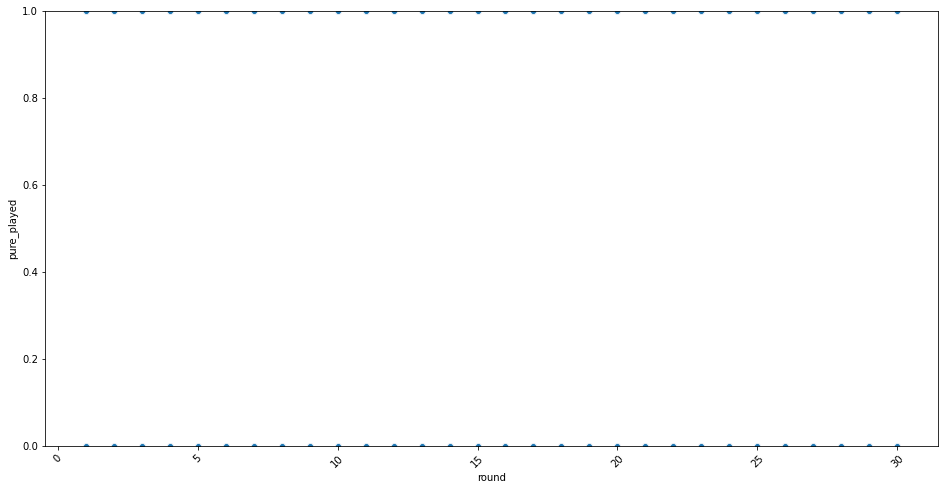

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.concat([player_DF['pure_played'], player_DF['round']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.scatterplot(x= player_DF['round'], y=player_DF['pure_played'], data=data)
fig.axis(ymin=0, ymax=1);
plt.xticks(rotation=45);